# Explore FlyBase Samples

In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pymongo import MongoClient

# Project level imports
sys.path.insert(0, '../lib')
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs

# Setup notebook
nbconfig = Nb.setup_notebook()

# Turn on cache
from joblib import Memory
memory = Memory(cachedir=nbconfig.cache, verbose=0)

# Connect to data store
store = pd.HDFStore('../sra.h5', mode='r')

with open('/home/fearjm/Projects/ncbi_remap/output/.mongodb_host', 'r') as fh:
    host = fh.read().strip()
client = MongoClient(host=host, port=27022)
db = client['sra2']
ncbi = db['ncbi']

last updated: 2018-02-13 
Git hash: 72422ef06747d1215ff3ee6f53c32f5d4f010ff8


In [2]:
fb = pd.read_csv('../output/flybase_samples.tsv', sep='\t')

In [3]:
df = pd.DataFrame(list(ncbi.aggregate([
    {
        '$match': {
            '_id': {'$in': fb.srx.unique().tolist()}
        }
    },
    {
        '$project': {
            '_id': 0,
            'srx': '$_id',
            'strat': '$sra.experiment.library_strategy'
        }
    }
])))

In [4]:
df.groupby('strat').size()

strat
EST           133
OTHER         523
RNA-Seq      4062
ncRNA-Seq       5
dtype: int64

In [65]:
#srxs = df.srx.unique().tolist()
srxs = df[df.strat == 'RNA-Seq'].srx.unique().tolist()

In [46]:
#cv = store.select('prealn/workflow/feature_counts/counts', 'srx == srxs and FBgn == FBgn0031081')

In [47]:
store.root.prealn.workflow.collectrnaseqmetrics.first

/prealn/workflow/collectrnaseqmetrics/first (Group) ''
  children := ['table' (Table)]

In [66]:
dd = store.select('prealn/workflow/collectrnaseqmetrics/first', 'srx == srxs')

In [67]:
dd.head()

,,CODING_BASES,CORRECT_STRAND_READS,IGNORED_READS,INCORRECT_STRAND_READS,INTERGENIC_BASES,INTRONIC_BASES,LIBRARY,MEDIAN_3PRIME_BIAS,MEDIAN_5PRIME_BIAS,MEDIAN_5PRIME_TO_3PRIME_BIAS,...,PCT_R2_TRANSCRIPT_STRAND_READS,PCT_RIBOSOMAL_BASES,PCT_USABLE_BASES,PCT_UTR_BASES,PF_ALIGNED_BASES,PF_BASES,READ_GROUP,RIBOSOMAL_BASES,SAMPLE,UTR_BASES
srx,srr,,,,,,,,,,,,,,,,,,,,,
SRX2541782,SRR5234256,780477711,374543,0,8061645,4261270,8793815,NaN,0.480405,0.035758,0.089864,...,0.955791,NaN,0.929315,0.283640,1107728932,1177935850,NaN,NaN,NaN,314196136
SRX2541781,SRR5234255,1132009725,483851,0,14427572,7694024,16131450,NaN,0.498561,0.034192,0.083288,...,0.967751,NaN,0.894001,0.326727,1716741854,1893639850,NaN,NaN,NaN,560906655
SRX2541780,SRR5234254,1096594006,451799,0,10816139,7199184,20608107,NaN,0.525108,0.033812,0.080478,...,0.960095,NaN,0.910165,0.272086,1544690187,1666603000,NaN,NaN,NaN,420288890
SRX2541779,SRR5234253,1003871659,529290,0,11587057,20661535,15148754,NaN,0.520353,0.038342,0.087381,...,0.956446,NaN,0.908467,0.311256,1509532753,1622207750,NaN,NaN,NaN,469850805
SRX2541778,SRR5234252,925768673,471282,0,9249692,5026043,18207055,NaN,0.483001,0.037370,0.093534,...,0.951676,NaN,0.914458,0.285327,1327881656,1426691050,NaN,NaN,NaN,378879885


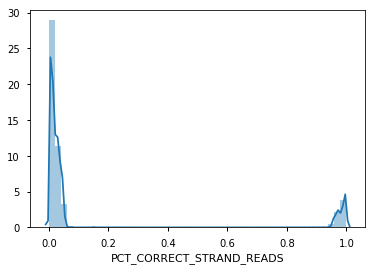

In [68]:
sns.distplot(dd.PCT_CORRECT_STRAND_READS)

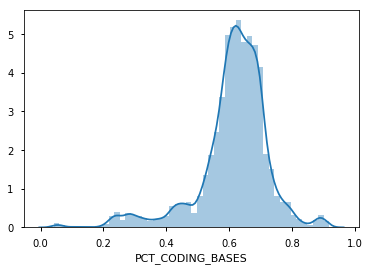

In [69]:
sns.distplot(dd.PCT_CODING_BASES)

In [75]:
fb[fb.srx.isin(df.loc[df.strat == 'RNA-Seq', 'srx'].tolist())].to_csv('../output/flybase_samples_annot_RNA-Seq.tsv', sep='\t', index=False)